In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import re
from bs4 import BeautifulSoup


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/train.csv")
df.dropna(inplace=True)

In [3]:
df.shape

(404287, 6)

In [4]:
df.head()

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

In [5]:
new_df = df.sample(50000,random_state=2)

In [6]:
new_df

id    qid1    qid2  \
331535  331535  169053  295926   
45407    45407   81383   81384   
286200  286200  285024  406729   
157195  157195  245856  245857   
154346  154346  242075  242076   
...        ...     ...     ...   
217289  217289  183375  206459   
389109  389109  241246  288221   
245364  245364   44714  358201   
86149    86149  145328  145329   
140517  140517  223283  223284   

                                                question1  \
331535                         How can I learn Norwegian?   
45407                  How are currency rates determined?   
286200                              What is substitution?   
157195      How can I make iPhone 4s faster with IOS 9.2?   
154346  How can I help my girlfriend cope with her par...   
...                                                   ...   
217289                What is the best motivational book?   
389109                     What is a narrative paragraph?   
245364               Is it healthy for dogs to eat bones?   
86149   If a boy doesn't respond to my messages, shoul...   
140517  What is the most expensive item that people ar...   

                                                question2  is_duplicate  
331535       What is the quickest way to learn Norwegian?             1  
45407        Where and how are exchange rates determined?             1  
286200             What is a substitute for caciocavallo?             0  
157195  I have an iPhone 4S. How do I make it faster a...             1  
154346  What can I do to help my girlfriend through he...             1  
...                                                   ...           ...  
217289                  What are some motivational books?             1  
389109  What is a narrative paragraph? What are some e...             1  
245364        Is it safe to feed my dog cooked ham bones?             0  
86149     How do I message to a girl who doesn't know me?             0  
140517  What is the most expensive item that people ar...             1  

[50000 rows x 6 columns]

In [7]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [8]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 331535 to 140517
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            50000 non-null  int64 
 1   qid1          50000 non-null  int64 
 2   qid2          50000 non-null  int64 
 3   question1     50000 non-null  object
 4   question2     50000 non-null  object
 5   is_duplicate  50000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.7+ MB


In [9]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q

In [10]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [11]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [12]:
new_df.head()

id    qid1    qid2  \
331535  331535  169053  295926   
45407    45407   81383   81384   
286200  286200  285024  406729   
157195  157195  245856  245857   
154346  154346  242075  242076   

                                                question1  \
331535                          how can i learn norwegian   
45407                   how are currency rates determined   
286200                               what is substitution   
157195       how can i make iphone 4s faster with ios 9 2   
154346  how can i help my girlfriend cope with her par...   

                                                question2  is_duplicate  
331535        what is the quickest way to learn norwegian             1  
45407         where and how are exchange rates determined             1  
286200              what is a substitute for caciocavallo             0  
157195  i have an iphone 4s  how do i make it faster a...             1  
154346  what can i do to help my girlfriend through he...             1

In [13]:
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [14]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

id    qid1    qid2  \
331535  331535  169053  295926   
45407    45407   81383   81384   
286200  286200  285024  406729   
157195  157195  245856  245857   
154346  154346  242075  242076   

                                                question1  \
331535                          how can i learn norwegian   
45407                   how are currency rates determined   
286200                               what is substitution   
157195       how can i make iphone 4s faster with ios 9 2   
154346  how can i help my girlfriend cope with her par...   

                                                question2  is_duplicate  \
331535        what is the quickest way to learn norwegian             1   
45407         where and how are exchange rates determined             1   
286200              what is a substitute for caciocavallo             0   
157195  i have an iphone 4s  how do i make it faster a...             1   
154346  what can i do to help my girlfriend through he...             1   

        q1_len  q2_len  q1_num_words  q2_num_words  
331535      25      43             5             8  
45407       33      43             5             7  
286200      20      37             3             6  
157195      44      72            11            17  
154346      58      63            11            12

In [15]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [16]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

id    qid1    qid2  \
331535  331535  169053  295926   
45407    45407   81383   81384   
286200  286200  285024  406729   
157195  157195  245856  245857   
154346  154346  242075  242076   

                                                question1  \
331535                          how can i learn norwegian   
45407                   how are currency rates determined   
286200                               what is substitution   
157195       how can i make iphone 4s faster with ios 9 2   
154346  how can i help my girlfriend cope with her par...   

                                                question2  is_duplicate  \
331535        what is the quickest way to learn norwegian             1   
45407         where and how are exchange rates determined             1   
286200              what is a substitute for caciocavallo             0   
157195  i have an iphone 4s  how do i make it faster a...             1   
154346  what can i do to help my girlfriend through he...             1   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  
331535      25      43             5             8            2  
45407       33      43             5             7            4  
286200      20      37             3             6            2  
157195      44      72            11            17            6  
154346      58      63            11            12            8

In [17]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [18]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

id    qid1    qid2  \
331535  331535  169053  295926   
45407    45407   81383   81384   
286200  286200  285024  406729   
157195  157195  245856  245857   
154346  154346  242075  242076   

                                                question1  \
331535                          how can i learn norwegian   
45407                   how are currency rates determined   
286200                               what is substitution   
157195       how can i make iphone 4s faster with ios 9 2   
154346  how can i help my girlfriend cope with her par...   

                                                question2  is_duplicate  \
331535        what is the quickest way to learn norwegian             1   
45407         where and how are exchange rates determined             1   
286200              what is a substitute for caciocavallo             0   
157195  i have an iphone 4s  how do i make it faster a...             1   
154346  what can i do to help my girlfriend through he...             1   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  
331535      25      43             5             8            2          13  
45407       33      43             5             7            4          12  
286200      20      37             3             6            2           9  
157195      44      72            11            17            6          27  
154346      58      63            11            12            8          23

In [19]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

id    qid1    qid2  \
331535  331535  169053  295926   
45407    45407   81383   81384   
286200  286200  285024  406729   
157195  157195  245856  245857   
154346  154346  242075  242076   

                                                question1  \
331535                          how can i learn norwegian   
45407                   how are currency rates determined   
286200                               what is substitution   
157195       how can i make iphone 4s faster with ios 9 2   
154346  how can i help my girlfriend cope with her par...   

                                                question2  is_duplicate  \
331535        what is the quickest way to learn norwegian             1   
45407         where and how are exchange rates determined             1   
286200              what is a substitute for caciocavallo             0   
157195  i have an iphone 4s  how do i make it faster a...             1   
154346  what can i do to help my girlfriend through he...             1   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  \
331535      25      43             5             8            2          13   
45407       33      43             5             7            4          12   
286200      20      37             3             6            2           9   
157195      44      72            11            17            6          27   
154346      58      63            11            12            8          23   

        word_share  
331535        0.15  
45407         0.33  
286200        0.22  
157195        0.22  
154346        0.35

In [20]:
new_df.shape

(50000, 13)

## Advance Features:

**1. Token Features**<br>
**cwc_min**: This is the ratio of the number of common words to the length of the smaller question<br>
**cwc_max**: This is the ratio of the number of common words to the length of the larger question<br>
**csc_min**: This is the ratio of the number of common stop words to the smaller stop word count among the two questions<br>
**csc_max**: This is the ratio of the number of common stop words to the larger stop word count among the two questions<br>
**ctc_min**: This is the ratio of the number of common tokens to the smaller token count among the two questions<br>
**ctc_max**: This is the ratio of the number of common tokens to the larger token count among the two questions<br>
**last_word_eq**: 1 if the last word in the two questions is same, 0 otherwise<br>
**first_word_eq**: 1 if the first word in the two questions is same, 0 otherwise<br>

In [21]:
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [22]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features)) #14
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features)) #15
new_df["csc_min"]       = list(map(lambda x: x[2], token_features)) #16
new_df["csc_max"]       = list(map(lambda x: x[3], token_features)) #17
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features)) #18 
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features)) #19
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features)) #20
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features)) #21

In [23]:
new_df.shape

(50000, 21)

**2. Length Based Features**<br>
**mean_len**: Mean of the length of the two questions (number of words)<br>
**abs_len_diff**: Absolute difference between the length of the two questions (number of words)<br>
**longest_substr_ratio**: Ratio of the length of the longest substring among the two questions to the length of the smaller question<br>

In [24]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [25]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features)) #22
new_df['mean_len'] = list(map(lambda x: x[1], length_features)) #23
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features)) #24

In [26]:
new_df.head()

id    qid1    qid2  \
331535  331535  169053  295926   
45407    45407   81383   81384   
286200  286200  285024  406729   
157195  157195  245856  245857   
154346  154346  242075  242076   

                                                question1  \
331535                          how can i learn norwegian   
45407                   how are currency rates determined   
286200                               what is substitution   
157195       how can i make iphone 4s faster with ios 9 2   
154346  how can i help my girlfriend cope with her par...   

                                                question2  is_duplicate  \
331535        what is the quickest way to learn norwegian             1   
45407         where and how are exchange rates determined             1   
286200              what is a substitute for caciocavallo             0   
157195  i have an iphone 4s  how do i make it faster a...             1   
154346  what can i do to help my girlfriend through he...             1   

        q1_len  q2_len  q1_num_words  q2_num_words  ...   cwc_max   csc_min  \
331535      25      43             5             8  ...  0.499988  0.000000   
45407       33      43             5             7  ...  0.666644  0.999950   
286200      20      37             3             6  ...  0.000000  0.999950   
157195      44      72            11            17  ...  0.571420  0.499988   
154346      58      63            11            12  ...  0.799984  0.666656   

         csc_max   ctc_min   ctc_max  last_word_eq  first_word_eq  \
331535  0.000000  0.399992  0.249997           1.0            0.0   
45407   0.499988  0.799984  0.571420           1.0            0.0   
286200  0.499988  0.666644  0.333328           0.0            1.0   
157195  0.222220  0.545450  0.374998           0.0            0.0   
154346  0.499994  0.727266  0.666661           1.0            0.0   

        abs_len_diff  mean_len  longest_substr_ratio  
331535           3.0       6.5              0.615385  
45407            2.0       6.0              0.500000  
286200           3.0       4.5              0.476190  
157195           5.0      13.5              0.244444  
154346           1.0      11.5              0.355932  

[5 rows x 24 columns]

## 3. Fuzzy Features
**fuzz_ratio**: fuzz_ratio score from fuzzywuzzy <br>
**fuzz_partial_ratio**: fuzz_partial_ratio from fuzzywuzzy <br>
**token_sort_ratio**: token_sort_ratio from fuzzywuzzy <br>
**token_set_ratio**: token_set_ratio from fuzzywuzzy <br>

In [30]:
# !pip install fuzzywuzzy

In [31]:
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [32]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features)) #25
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features)) #26
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features)) #27
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features)) #28

In [33]:
print(new_df.shape)
new_df.head(5)

(50000, 28)


id    qid1    qid2  \
331535  331535  169053  295926   
45407    45407   81383   81384   
286200  286200  285024  406729   
157195  157195  245856  245857   
154346  154346  242075  242076   

                                                question1  \
331535                          how can i learn norwegian   
45407                   how are currency rates determined   
286200                               what is substitution   
157195       how can i make iphone 4s faster with ios 9 2   
154346  how can i help my girlfriend cope with her par...   

                                                question2  is_duplicate  \
331535        what is the quickest way to learn norwegian             1   
45407         where and how are exchange rates determined             1   
286200              what is a substitute for caciocavallo             0   
157195  i have an iphone 4s  how do i make it faster a...             1   
154346  what can i do to help my girlfriend through he...             1   

        q1_len  q2_len  q1_num_words  q2_num_words  ...   ctc_max  \
331535      25      43             5             8  ...  0.249997   
45407       33      43             5             7  ...  0.571420   
286200      20      37             3             6  ...  0.333328   
157195      44      72            11            17  ...  0.374998   
154346      58      63            11            12  ...  0.666661   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
331535           1.0            0.0           3.0       6.5   
45407            1.0            0.0           2.0       6.0   
286200           0.0            1.0           3.0       4.5   
157195           0.0            0.0           5.0      13.5   
154346           1.0            0.0           1.0      11.5   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
331535              0.615385          59                  68   
45407               0.500000          71                  82   
286200              0.476190          67                  85   
157195              0.244444          45                  55   
154346              0.355932          81                  81   

        token_sort_ratio  token_set_ratio  
331535                50               75  
45407                 63               84  
286200                60               60  
157195                61               76  
154346                78               86  

[5 rows x 28 columns]

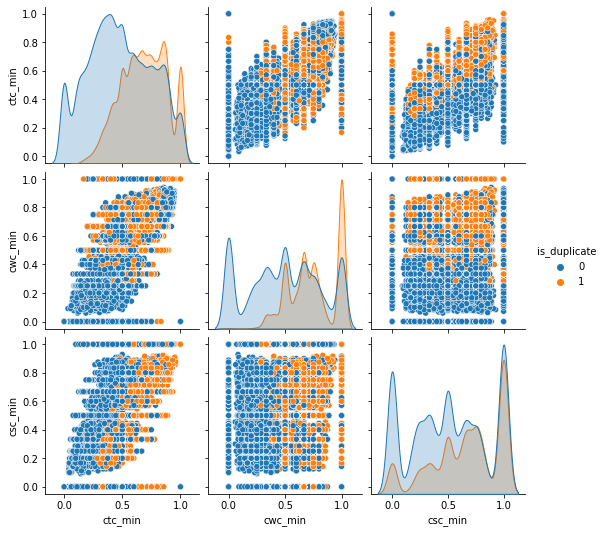

In [34]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

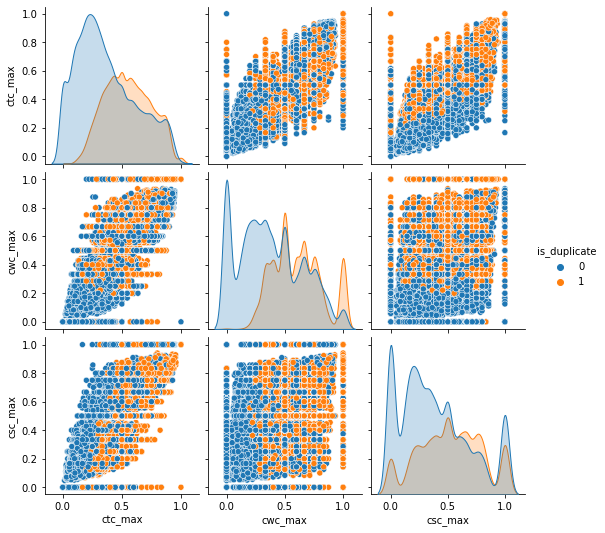

In [35]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

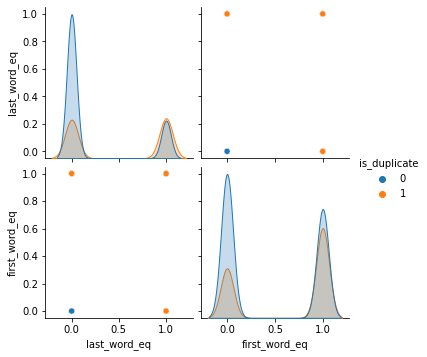

In [36]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

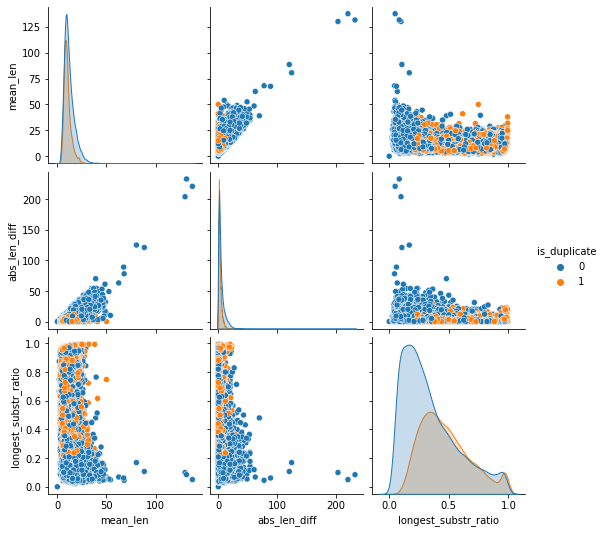

In [37]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

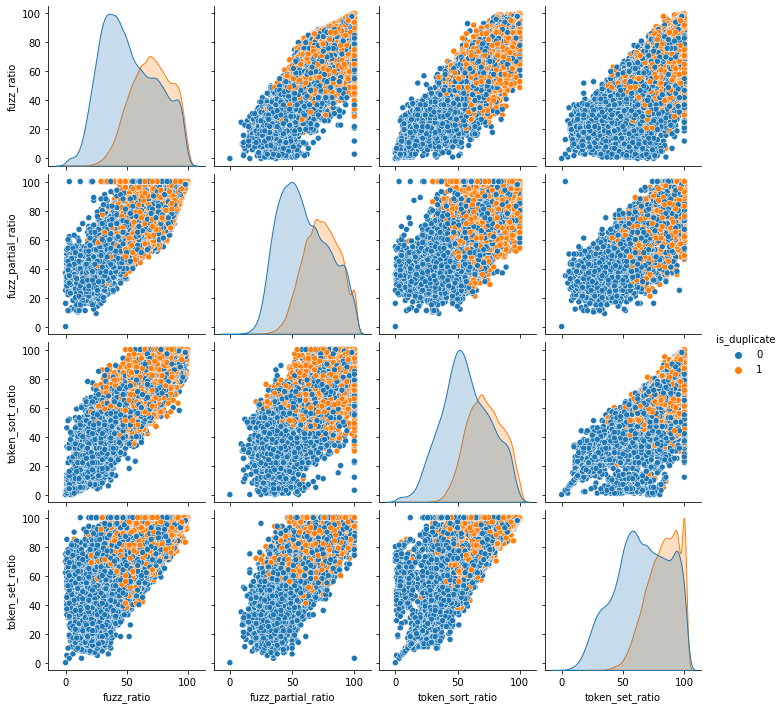

In [39]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],
             hue='is_duplicate')

In [40]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_df['is_duplicate'].values

In [41]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 50000 samples in 0.078s...
[t-SNE] Computed neighbors for 50000 samples in 5.655s...
[t-SNE] Computed conditional probabilities for sample 1000 / 50000
[t-SNE] Computed conditional probabilities for sample 2000 / 50000
[t-SNE] Computed conditional probabilities for sample 3000 / 50000
[t-SNE] Computed conditional probabilities for sample 4000 / 50000
[t-SNE] Computed conditional probabilities for sample 5000 / 50000
[t-SNE] Computed conditional probabilities for sample 6000 / 50000
[t-SNE] Computed conditional probabilities for sample 7000 / 50000
[t-SNE] Computed conditional probabilities for sample 8000 / 50000
[t-SNE] Computed conditional probabilities for sample 9000 / 50000
[t-SNE] Computed conditional probabilities for sample 10000 / 50000
[t-SNE] Computed conditional probabilities for sample 11000 / 50000
[t-SNE] Computed conditional probabilities for sample 12000 / 50000
[t-SNE] Computed conditional probabilities for sam

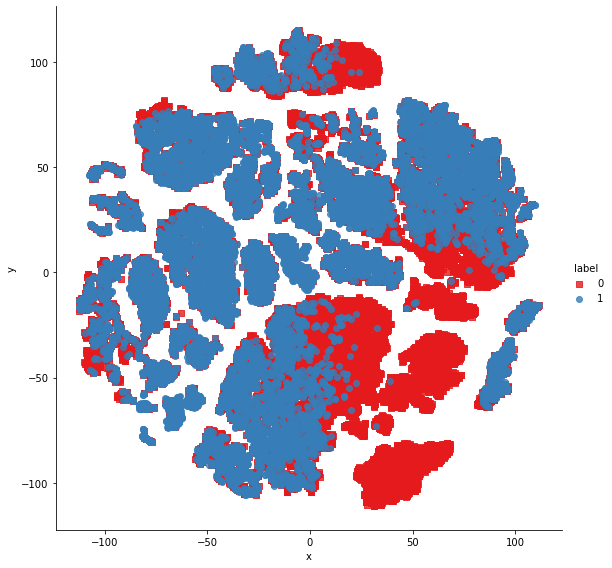

In [42]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])

In [43]:
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 50000 samples in 0.070s...
[t-SNE] Computed neighbors for 50000 samples in 5.560s...
[t-SNE] Computed conditional probabilities for sample 1000 / 50000
[t-SNE] Computed conditional probabilities for sample 2000 / 50000
[t-SNE] Computed conditional probabilities for sample 3000 / 50000
[t-SNE] Computed conditional probabilities for sample 4000 / 50000
[t-SNE] Computed conditional probabilities for sample 5000 / 50000
[t-SNE] Computed conditional probabilities for sample 6000 / 50000
[t-SNE] Computed conditional probabilities for sample 7000 / 50000
[t-SNE] Computed conditional probabilities for sample 8000 / 50000
[t-SNE] Computed conditional probabilities for sample 9000 / 50000
[t-SNE] Computed conditional probabilities for sample 10000 / 50000
[t-SNE] Computed conditional probabilities for sample 11000 / 50000
[t-SNE] Computed conditional probabilities for sample 12000 / 50000
[t-SNE] Computed conditional probabilities for sam

In [44]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [45]:
ques_df = new_df[['question1','question2']]
ques_df.head()

question1  \
331535                          how can i learn norwegian   
45407                   how are currency rates determined   
286200                               what is substitution   
157195       how can i make iphone 4s faster with ios 9 2   
154346  how can i help my girlfriend cope with her par...   

                                                question2  
331535        what is the quickest way to learn norwegian  
45407         where and how are exchange rates determined  
286200              what is a substitute for caciocavallo  
157195  i have an iphone 4s  how do i make it faster a...  
154346  what can i do to help my girlfriend through he...

In [46]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(50000, 23)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
331535             1      25      43             5             8            2   
45407              1      33      43             5             7            4   
286200             0      20      37             3             6            2   
157195             1      44      72            11            17            6   
154346             1      58      63            11            12            8   

        word_total  word_share   cwc_min   cwc_max  ...   ctc_max  \
331535          13        0.15  0.999950  0.499988  ...  0.249997   
45407           12        0.33  0.666644  0.666644  ...  0.571420   
286200           9        0.22  0.000000  0.000000  ...  0.333328   
157195          27        0.22  0.666656  0.571420  ...  0.374998   
154346          23        0.35  0.999975  0.799984  ...  0.666661   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
331535           1.0            0.0           3.0       6.5   
45407            1.0            0.0           2.0       6.0   
286200           0.0            1.0           3.0       4.5   
157195           0.0            0.0           5.0      13.5   
154346           1.0            0.0           1.0      11.5   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
331535              0.615385          59                  68   
45407               0.500000          71                  82   
286200              0.476190          67                  85   
157195              0.244444          45                  55   
154346              0.355932          81                  81   

        token_sort_ratio  token_set_ratio  
331535                50               75  
45407                 63               84  
286200                60               60  
157195                61               76  
154346                78               86  

[5 rows x 23 columns]

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [48]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(50000, 6000)

In [49]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(50000, 6023)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
331535             1      25      43             5             8            2   
45407              1      33      43             5             7            4   
286200             0      20      37             3             6            2   
157195             1      44      72            11            17            6   
154346             1      58      63            11            12            8   

        word_total  word_share   cwc_min   cwc_max  ...  2990  2991  2992  \
331535          13        0.15  0.999950  0.499988  ...     0     0     0   
45407           12        0.33  0.666644  0.666644  ...     0     0     0   
286200           9        0.22  0.000000  0.000000  ...     0     0     0   
157195          27        0.22  0.666656  0.571420  ...     0     0     0   
154346          23        0.35  0.999975  0.799984  ...     0     0     0   

        2993  2994  2995  2996  2997  2998  2999  
331535     0     0     0     0     0     0     0  
45407      0     0     0     0     0     0     0  
286200     0     0     0     0     0     0     0  
157195     0     0     0     0     0     0     0  
154346     0     0     0     0     0     0     0  

[5 rows x 6023 columns]

## Split Data in Train, test

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,
                                                 test_size=0.2,
                                                 random_state=1)

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7886

In [53]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.7903

In [56]:
from sklearn.metrics import confusion_matrix
# for random forest model
confusion_matrix(y_test,y_pred)

array([[5367,  916],
       [1198, 2519]], dtype=int64)

In [57]:
# for xgboost model
confusion_matrix(y_test,y_pred1)

array([[5264, 1019],
       [1078, 2639]], dtype=int64)

In [58]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [59]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [60]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [61]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [62]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [63]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [64]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [65]:
rf.predict(query_point_creator(q1,q4))

array([0], dtype=int64)

In [66]:
cv

CountVectorizer(max_features=3000)

In [67]:
import pickle

pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))

In [ ]:
ss